In [2]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Masking, LeakyReLU
from tensorflow.keras import Sequential
import tensorflow as tf
from utils.video_processing import video2features
import numpy as np
import pandas as pd
from random import choice
import cv2
import seaborn as sns
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score)

In [1]:
def get_scores(y_true, y_pred, threshold=0.5):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    y_pred_bin = get_binary(y_pred, threshold=threshold)
    scores = {
        "accuracy": accuracy_score(y_true, y_pred_bin),
        "precision": precision_score(y_true, y_pred_bin),
        "recall": recall_score(y_true, y_pred_bin),
        "f1": f1_score(y_true, y_pred_bin),
        "auc": roc_auc_score(y_true, y_pred),
        "mcc": matthews_corrcoef(y_true, y_pred_bin),
    }
    return scores
def get_binary(y, threshold=0.5):
    return y >= threshold

In [3]:
model = Sequential()
model.add(LSTM(128))
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dense(1, activation='sigmoid'))

metric = tf.keras.metrics.BinaryAccuracy(
    name="binary_accuracy", dtype=None, threshold=0.5
)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [4]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metric])


In [5]:
data = np.load('../res/data/lstm_set.npz', allow_pickle=True)
X_test = data['X_test']
y_test = data['y_test']
X_train = data['X_train']
y_train = data['y_train']

In [6]:
losses = []
accuracies = []
df = pd.DataFrame(None, columns=['accuracy', 'precision', 'recall', 'f1', 'auc', 'mcc'])
for epoch in tqdm_notebook(range(50)):
    for x, y in zip(X_train, y_train):
        l, a = model.train_on_batch(x, np.array(y), reset_metrics=False)
        #x_f = np.flip(x, axis=1)
        #l, a = model.train_on_batch(x_f, np.array(y), reset_metrics=False)

    metric.reset_states()
    losses.append(l)
    accuracies.append(a)
    y_preds = []
    y_trues = []
    for x, y in zip(X_test, y_test):
        y_pred = model.predict_on_batch(x)
        
        y_preds.extend(y_pred.numpy().flatten().tolist())
        y_trues.extend(y)

    scores =  get_scores(y_trues, y_preds)
    df.loc[epoch, ['accuracy', 'precision', 'recall', 'f1', 'auc', 'mcc']] = (scores['accuracy'], scores['precision'], scores['recall'], scores['f1'], scores['auc'], scores['mcc'])

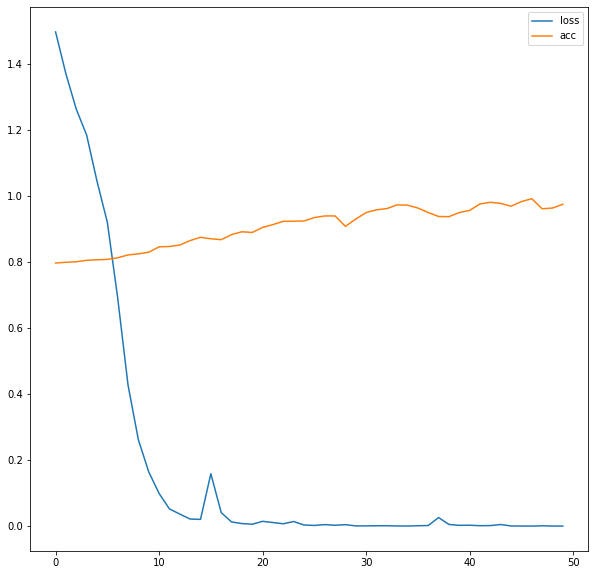

In [8]:
plt.figure(figsize=(10,10))

epochs = [i for i in range(len(losses))]
sns.lineplot(epochs, losses, label='loss')
sns.lineplot(epochs, accuracies, label='acc')
plt.legend()


In [9]:
df.head()

,accuracy,precision,recall,f1,auc,mcc
0,0.776042,0,0,0,0.539488,0
1,0.776042,0,0,0,0.556891,0
2,0.776042,0,0,0,0.570665,0
3,0.776042,0,0,0,0.571133,0
4,0.770833,0,0,0,0.583776,-0.0388709


In [10]:
df = df.astype(float)

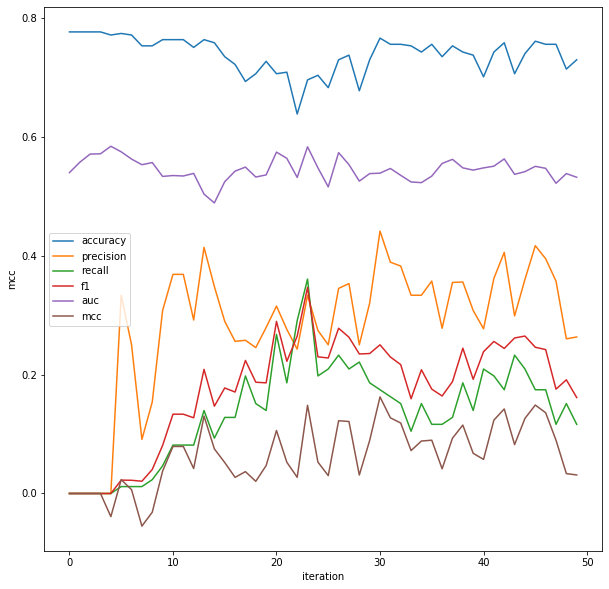

In [11]:
df['iteration'] = [i for i in range(df.shape[0])]

plt.figure(figsize=(10,10))
sns.lineplot(x='iteration', y='accuracy', label='accuracy', data=df)
sns.lineplot(x='iteration', y='precision', label='precision', data=df)
sns.lineplot(x='iteration', y='recall', label='recall', data=df)
sns.lineplot(x='iteration', y='f1', label='f1', data=df)
sns.lineplot(x='iteration', y='auc', label='auc',data=df)
sns.lineplot(x='iteration', y='mcc', label='mcc', data=df)
plt.legend()

In [9]:
accuracies

[0.7980403,
 0.7999456,
 0.80021775,
 0.802123,
 0.80348396,
 0.80702233,
 0.8111051,
 0.8102885,
 0.8138269,
 0.8211758,
 0.82988566,
 0.837779,
 0.83750683,
 0.8532934,
 0.85574305,
 0.8644529,
 0.86499727,
 0.8723462,
 0.8728906,
 0.8889494,
 0.8889494,
 0.8835057,
 0.8971149,
 0.9009254,
 0.9156233,
 0.9251497,
 0.91453457,
 0.9188895,
 0.86853564,
 0.91154057,
 0.9248775,
 0.94256943,
 0.939031,
 0.91371804,
 0.9314099,
 0.936037,
 0.9526402,
 0.96216655,
 0.9678824,
 0.9597169,
 0.97060424,
 0.97686446,
 0.94556344,
 0.9542733,
 0.9730539,
 0.9823081,
 0.9823081,
 0.93576485,
 0.9648884,
 0.9648884,
 0.98149157,
 0.98584646,
 0.97523135,
 0.98747957,
 0.9893849,
 0.9921067,
 0.9725095,
 0.9275994,
 0.9567229,
 0.98530215,
 0.9921067,
 0.9937398,
 0.9918345,
 0.9885683,
 0.9948285,
 0.9931954,
 0.98203593,
 0.9763201,
 0.98802394,
 0.98067504,
 0.9678824,
 0.99292326,
 0.99455637,
 0.9948285,
 0.99646163,
 0.9948285,
 0.98965704,
 0.99727815,
 0.99945563,
 0.9757757,
 0.97223735,


In [15]:
x_f = np.flip(x, axis=1)